## 인공지능과 가위바위보 하기

### 간단한 이미지 분류기

__제작 순서__  
데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 테스트(평가)

### MNIST 숫자 손글씨 Dataset 불러들이기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.6.0


In [16]:
mnist = keras.datasets.mnist

# MNIST 데이터를 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))

60000


In [10]:
len(x_train[0])

28

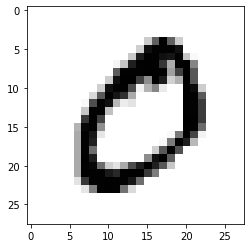

In [17]:
plt.imshow(x_train[1], cmap = plt.cm.binary)
plt.show()

In [19]:
print(y_train[1])

0


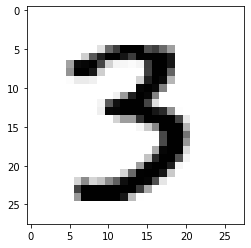

In [26]:
index = 10000
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()

In [30]:
print("훈련용 데이터 크기 : ",x_train.shape)
print("테스트 데이터 크기 : ",x_test.shape)

훈련용 데이터 크기 :  (60000, 28, 28)
테스트 데이터 크기 :  (10000, 28, 28)


In [32]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [33]:
# 정규화
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [34]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


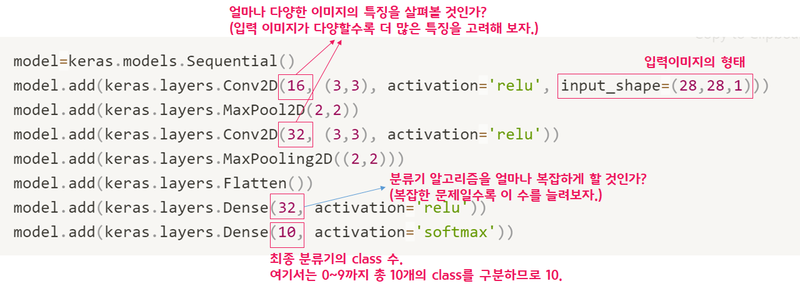

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [36]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

# 채널수 값을 넣어주자
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [37]:
# 학습시키기
model.compile(optimizer = "adam", 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(x_train_reshaped, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1889 - accuracy: 0.9427
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0703 - accuracy: 0.9781
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0533 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0423 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0345 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0303 - accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0252 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0220 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0172 - accuracy: 0.9946
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.016

### 테스트 데이터로 성능 확인하기

In [41]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=1)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9894
test_loss: 0.03742839768528938
test_accuracy: 0.9894000291824341


In [42]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [8.6621493e-10 1.5262287e-08 3.6547647e-08 2.6178413e-09 2.6227916e-11
 5.2532598e-13 1.1590865e-16 1.0000000e+00 2.7770208e-09 1.5377326e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


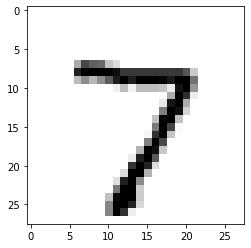

In [43]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [44]:
predicted_result

array([[8.6621493e-10, 1.5262287e-08, 3.6547647e-08, ..., 1.0000000e+00,
        2.7770208e-09, 1.5377326e-08],
       [9.3882727e-07, 9.8995901e-05, 9.9989998e-01, ..., 2.7469051e-14,
        5.1794654e-08, 9.2623097e-11],
       [3.0136122e-09, 9.9999464e-01, 8.0619644e-10, ..., 1.1271045e-06,
        2.4326692e-07, 2.2919851e-08],
       ...,
       [1.2885170e-12, 1.6163755e-08, 2.8623062e-16, ..., 7.2406765e-09,
        2.4500357e-08, 2.5738132e-08],
       [5.1002544e-09, 8.9221521e-15, 2.1803124e-15, ..., 6.0748536e-13,
        3.2969220e-07, 8.3647873e-11],
       [1.3096331e-10, 2.4677118e-11, 1.2208786e-12, ..., 1.6868652e-16,
        1.9094533e-09, 3.3015540e-10]], dtype=float32)

예측확률분포: [6.0048022e-10 7.0979106e-01 2.9013240e-01 1.1767315e-08 6.1034669e-08
 8.4572584e-08 1.5599532e-09 2.2360434e-09 7.6434371e-05 1.5401552e-11]
라벨: 2, 예측결과: 1


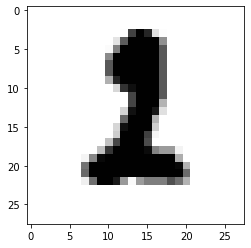

예측확률분포: [2.1725506e-12 6.8356476e-09 7.0085540e-02 2.5408722e-03 2.2035533e-09
 1.0699090e-12 2.0263435e-14 9.0888149e-01 1.8492123e-02 2.6117417e-10]
라벨: 2, 예측결과: 7


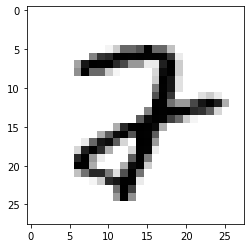

예측확률분포: [1.2973893e-05 7.4861788e-07 7.5586460e-04 4.7701142e-05 1.0086733e-04
 5.6675744e-01 1.0672488e-11 3.6656905e-07 7.3669056e-05 4.3225038e-01]
라벨: 9, 예측결과: 5


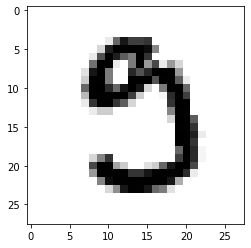

예측확률분포: [1.20078027e-11 6.19713741e-04 1.37678981e-01 8.75326441e-05
 2.48272863e-06 6.10097320e-11 8.08600322e-12 8.61611187e-01
 1.10670456e-07 8.74048300e-09]
라벨: 2, 예측결과: 7


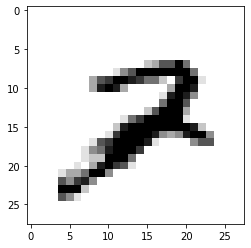

예측확률분포: [1.4045453e-11 4.9099494e-03 8.1877965e-01 2.7106951e-06 9.5680309e-07
 3.8209880e-11 2.2666861e-11 1.7630666e-01 2.4347825e-08 1.8376947e-12]
라벨: 7, 예측결과: 2


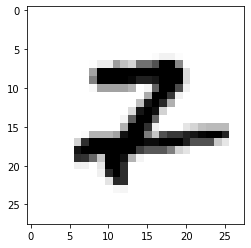

In [47]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 더 좋은 네트워크 만들어보기

In [51]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=40
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 40)                32040     
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

## 미니 프로젝트 : 가위바위보 분류기를 만들자

In [52]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.21.4
